In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D


# Load the dataset
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

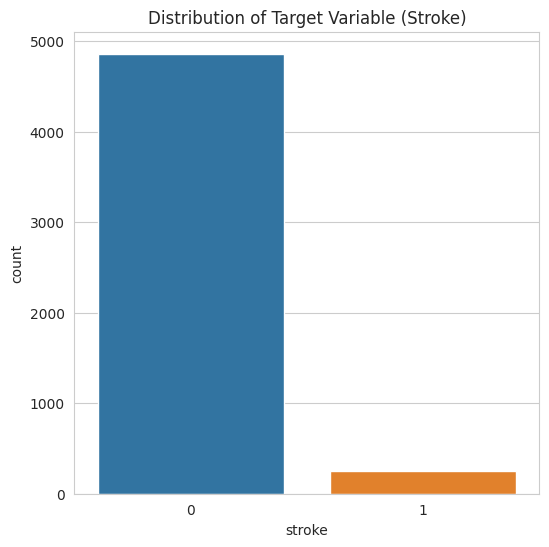

In [2]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(6, 6))
sns.countplot(x=data['stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.show()

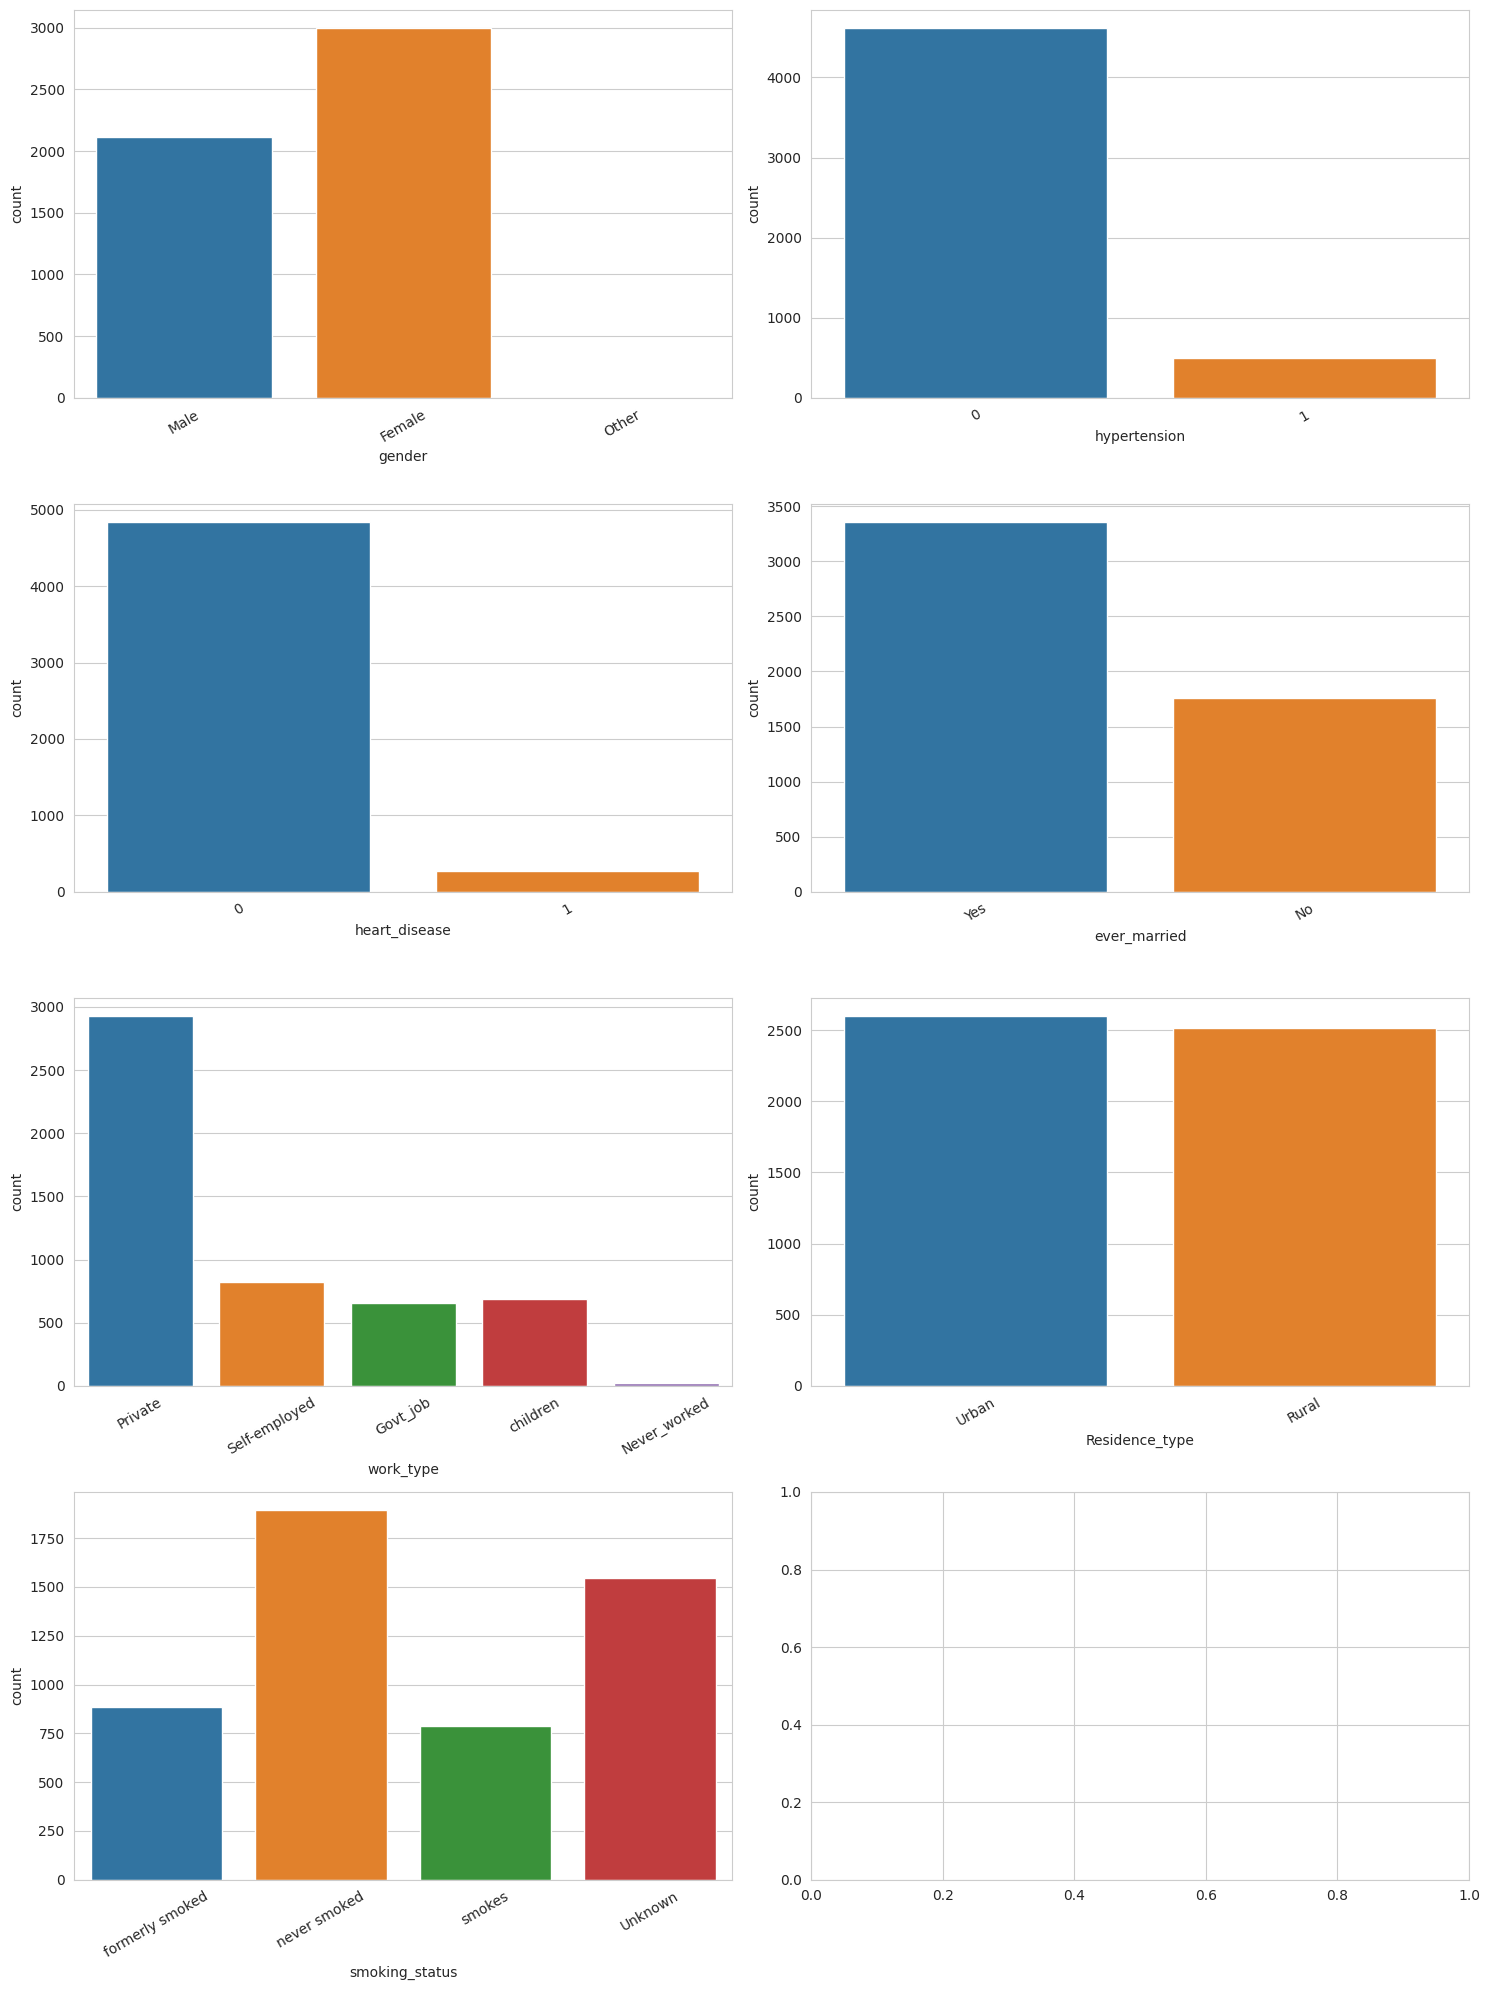

In [3]:
# List of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=var, data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

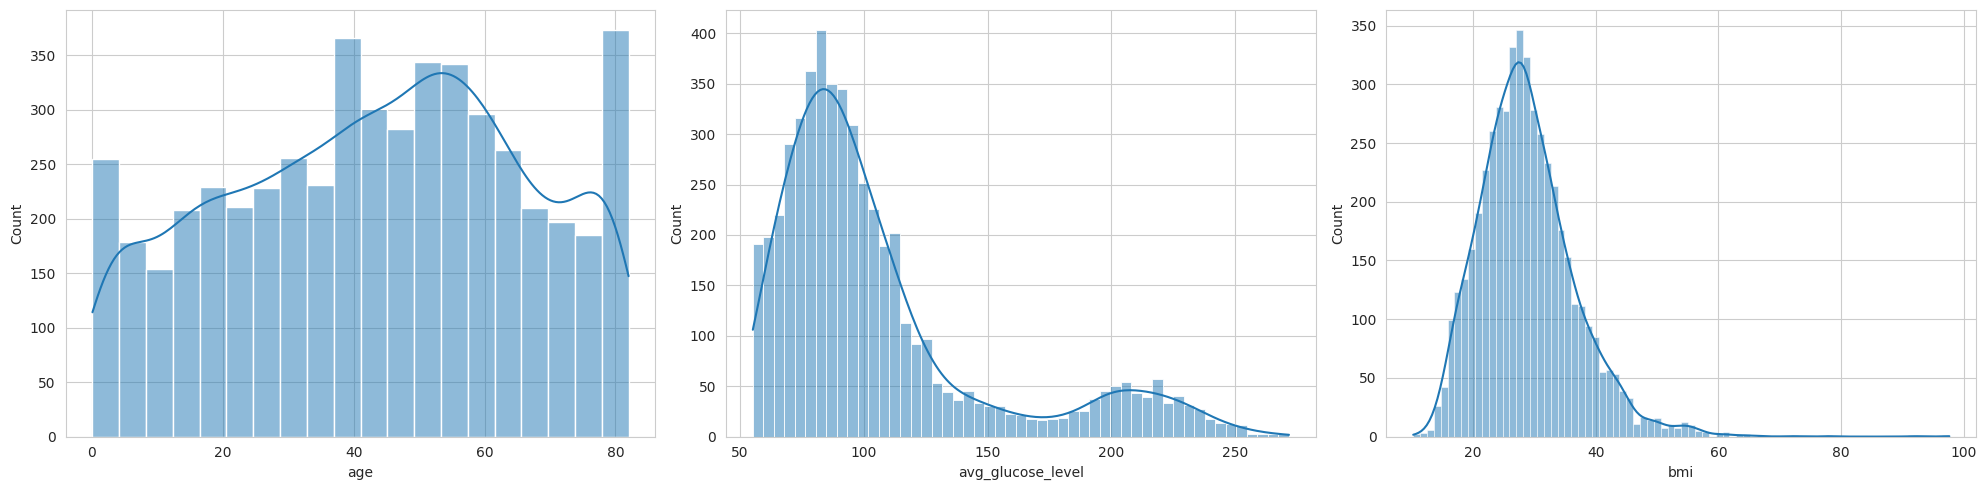

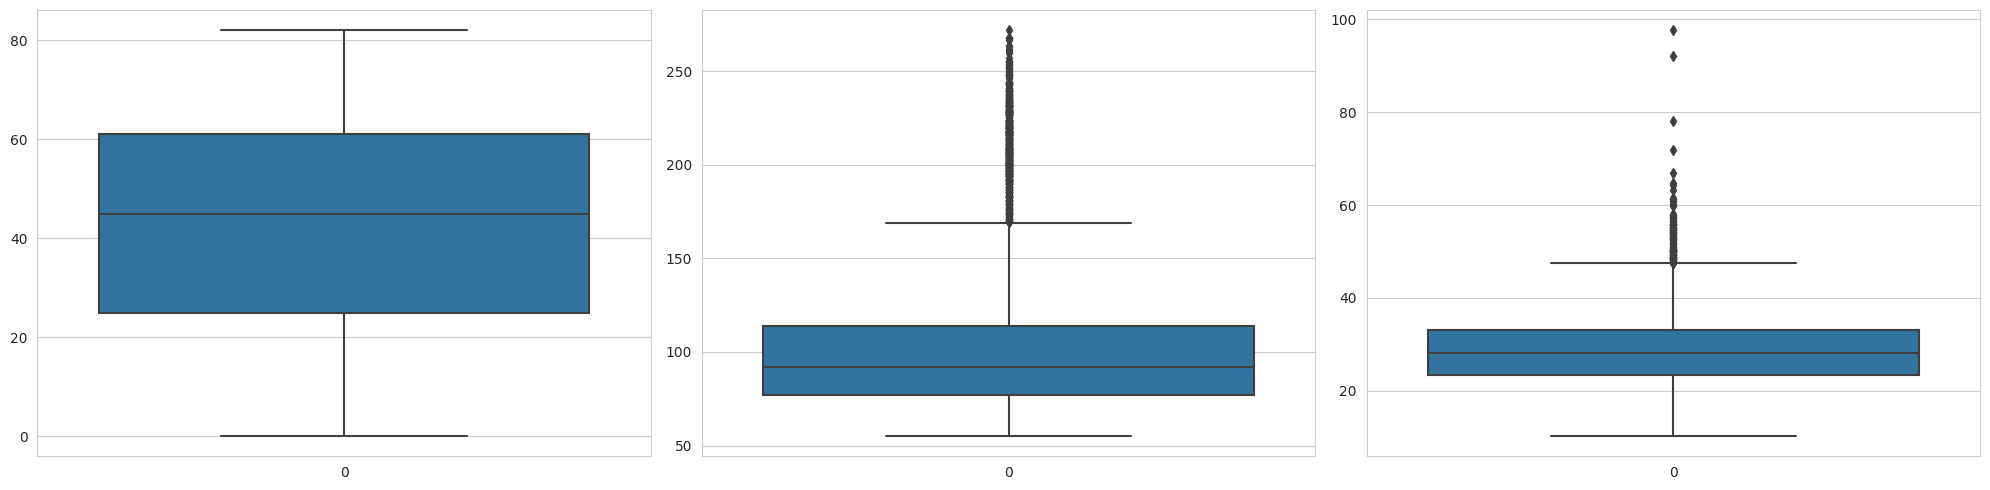

In [4]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()


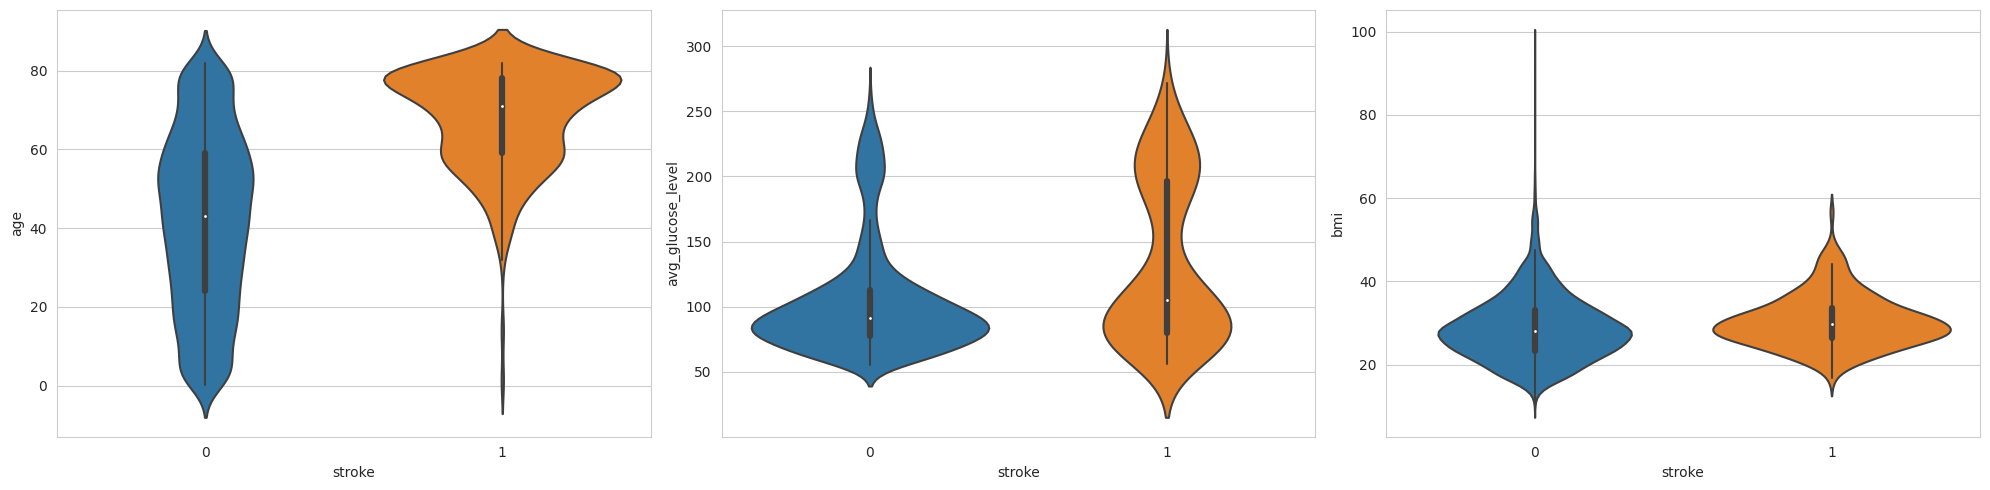

In [5]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=data['stroke'], y=data[var], ax=subplot)

plt.tight_layout()
plt.show()

In [8]:
# Re-load the original dataset
data_original = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data_original = data_original.drop("id",axis=1)

# Select categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding to the categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data_original[categorical_cols])

# Convert the one-hot encoded array into a dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset
data_original.drop(categorical_cols, axis=1, inplace=True)

# Concatenate the original dataframe with the one-hot encoded dataframe
data_one_hot_encoded = pd.concat([data_original, one_hot_encoded_df], axis=1)

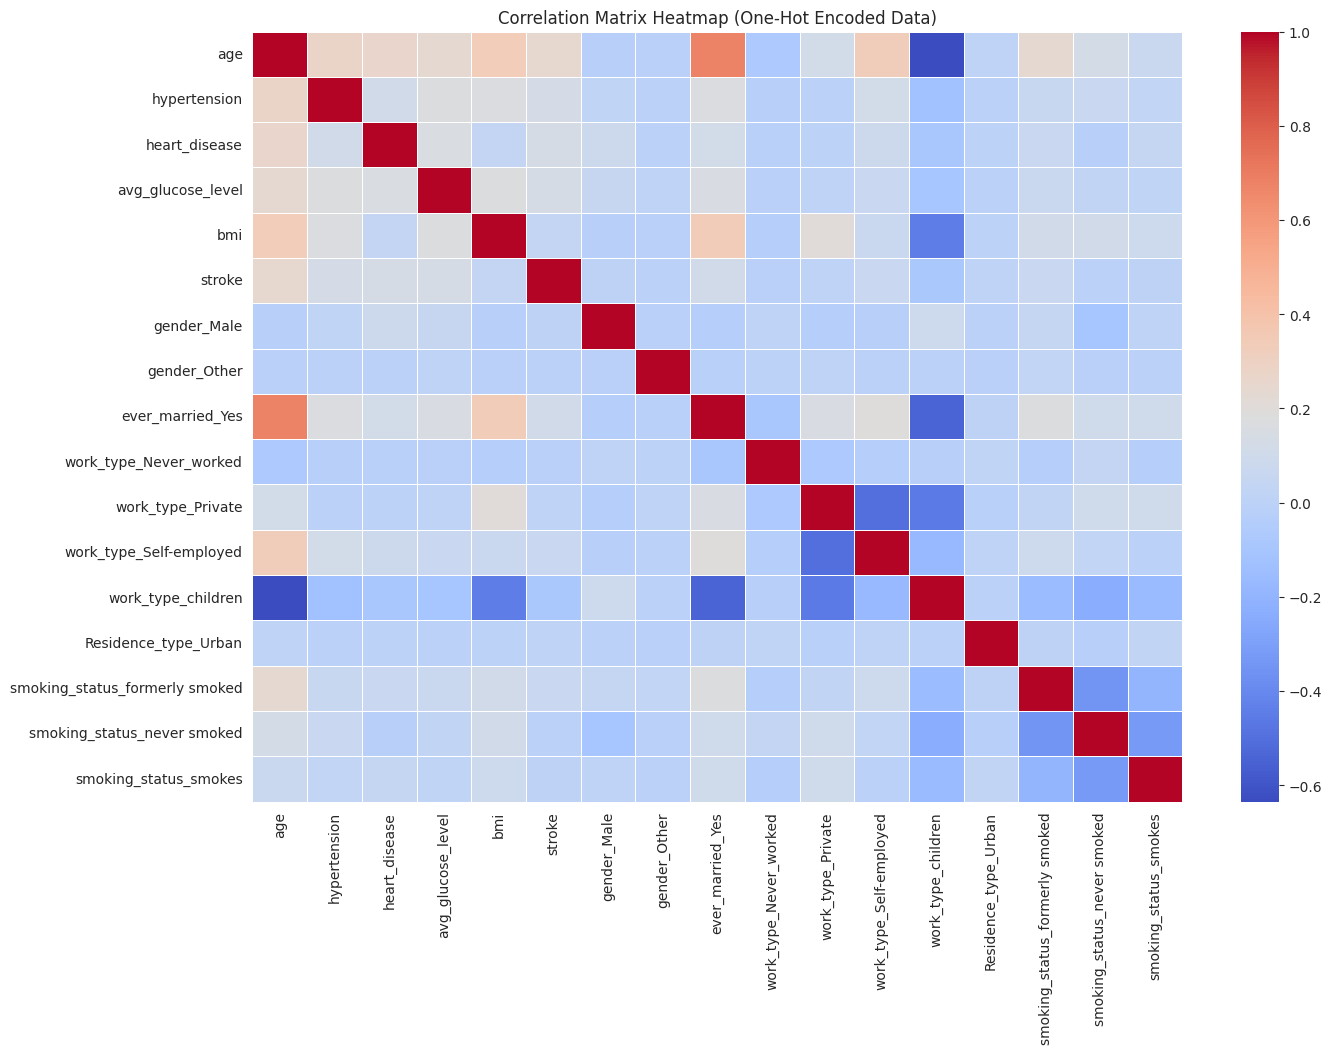

In [9]:
# Compute the correlation matrix for the one-hot encoded data
correlation_matrix_one_hot = data_one_hot_encoded.corr()

# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_one_hot, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (One-Hot Encoded Data)")
plt.show()

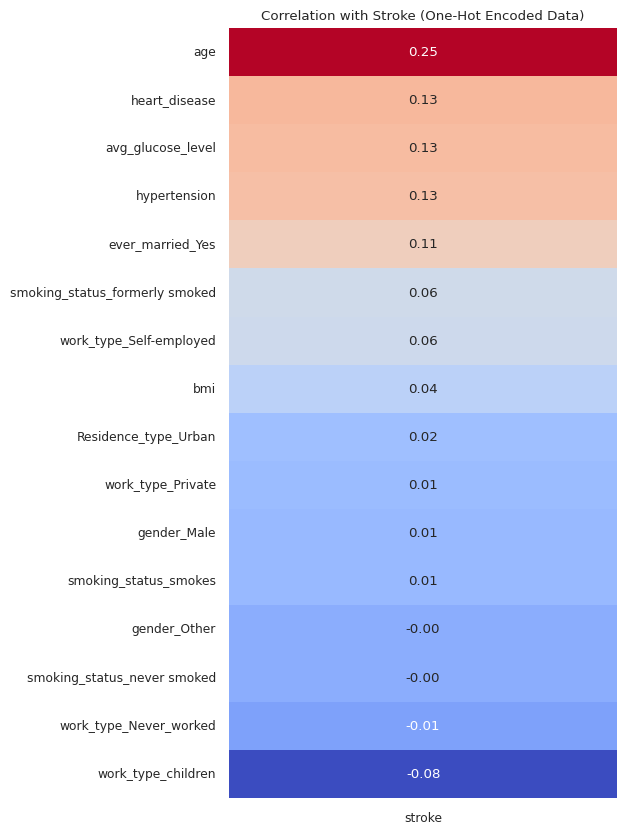

In [10]:
# Compute the correlation of each feature with the target variable 'stroke'
target_corr_one_hot = correlation_matrix_one_hot['stroke'].drop('stroke')

# Sort correlation values in descending order
target_corr_sorted_one_hot = target_corr_one_hot.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke (One-Hot Encoded Data)')
plt.show()

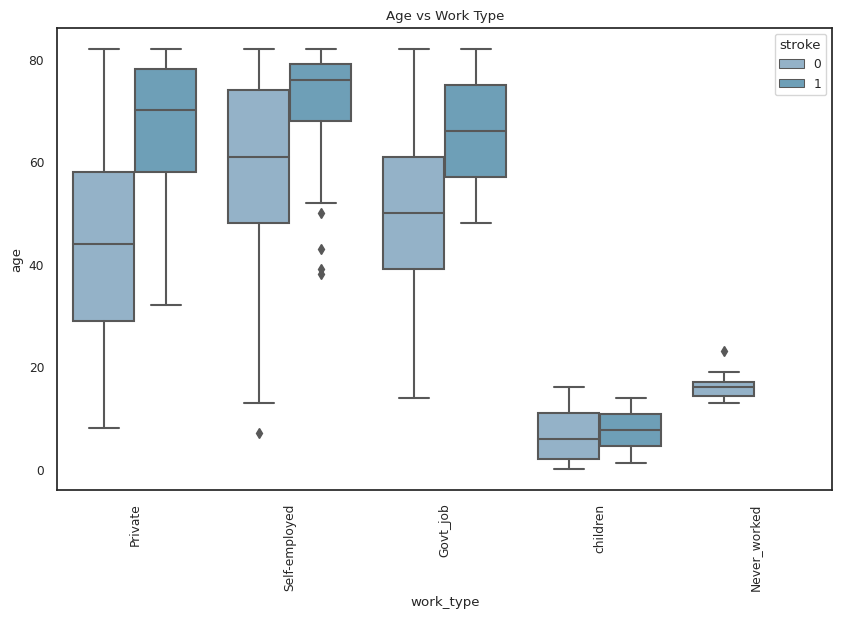

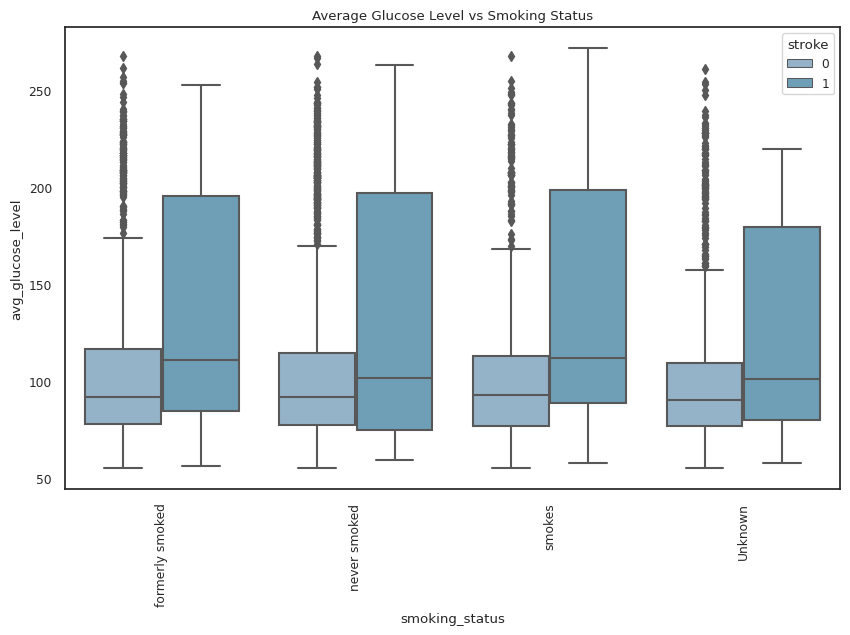

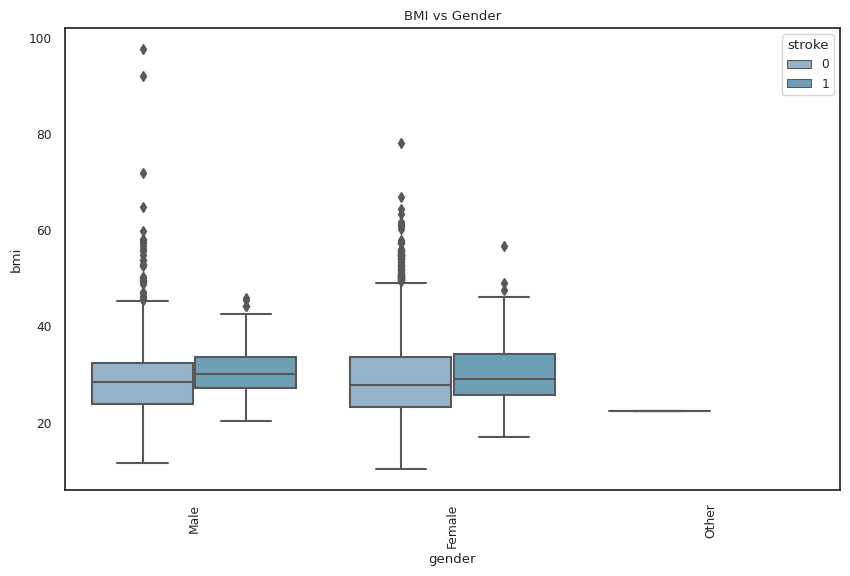

In [11]:
# Boxplot of 'age' vs 'work_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['work_type'], y=data['age'], hue=data['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'avg_glucose_level' vs 'smoking_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['smoking_status'], y=data['avg_glucose_level'], hue=data['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'bmi' vs 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gender'], y=data['bmi'], hue=data['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation=90)
plt.show()

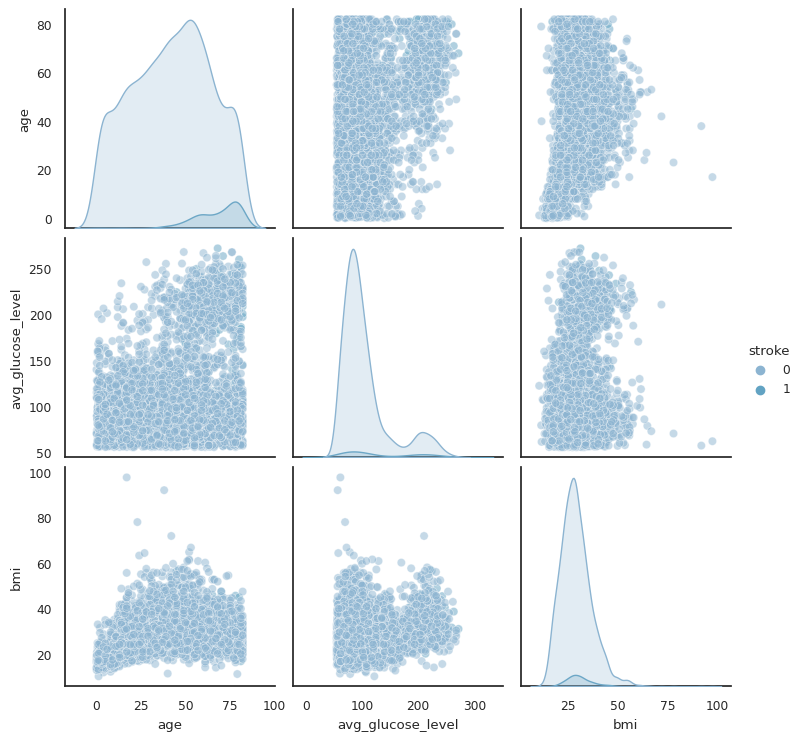

In [13]:
# Subset the data for the pairplot
subset = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke', plot_kws={'alpha': 0.5})
plt.show()